In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 8
fig_height = 6
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))


# reset state
%reset

def ojs_define(**kwargs):
  import json
  from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


/var/folders/by/3bf86pq91zd59zf28cf1r9w80000gn/T/ipykernel_40265/1758920420.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/Users/mfglabs/.pyenv/versions/3.9.7/lib/python3.9/importlib/_bootstrap.py": 1647338976.4783404, "/Users/mfglabs/.pyenv/versions/3.9.7/lib/python3.9/importlib/_bootstrap_external.py": 1647338976.482103, "/Users/mfglabs/.pyenv/versions/3.9.7/lib/python3.9/codecs.py": 1647338964.3530092, "/Users/mfglabs/.pyenv/versions/3.9.7/lib/python3.9/encodings/aliases.py": 1647338983.287878, "/Users/mfglabs/.pyenv/versions/3.9.7/lib/python3.9/encodings/__init__.py": 1647338983.283845, "/Users/mfglabs/.pyenv/versions/3.9.7/lib/python3.9/encodings/utf_8.py": 1647338984.4247696, "/Users/mfglabs/.pyenv/versions/3.9.7/lib/python3.9/encodings/latin_1.py": 1647338984.2951097, "/Users/mfglabs/.pyenv/versions/3.9.7/lib/python3.9/abc.py": 1647338964.2846549, "/Users/mfglabs/.pyenv/versions/3.9.7/lib/python3.9/io.py": 1647338964.4916904, "/Users/mfglabs/.pyenv/versions/3.9.7/lib/python3.9/stat.py": 1647338964.712451, "/Users/mfglabs/.pyenv/versions/3.9.7/lib/python3.9/_collections_abc.py": 1647338964.2398262

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display, Markdown

In [3]:
#| echo: true

# Load the train dataset
train = pd.read_csv('../data/train.csv')

# Build X_train and a y_train objects
X_train = train.drop(columns='label')
y_train = train['label']

# Reshape the data to an array of 28x28 images, dimensions expected by the model that will be built
X_train = np.array(X_train).reshape(-1,28,28,1)

In [4]:
display(Markdown("""
The shape of the train set is {shape}.
""".format(shape = X_train.shape)))


The shape of the train set is (42000, 28, 28, 1).


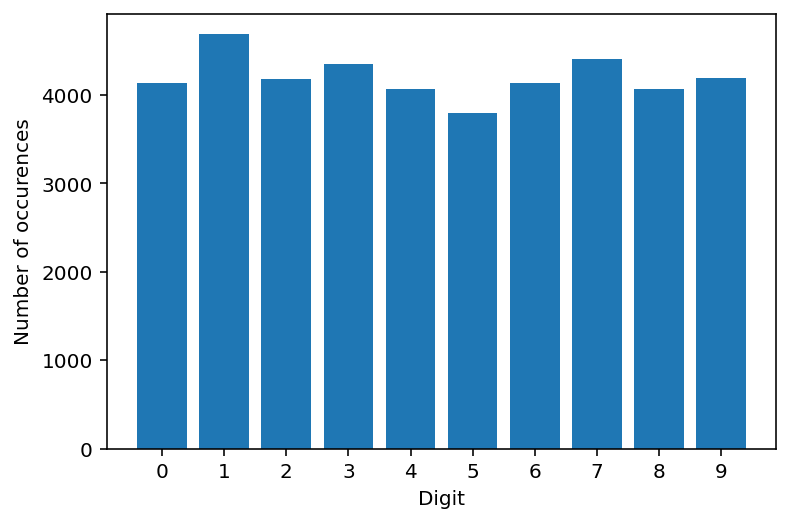

In [5]:
#| label: fig-data-distrib
#| fig-cap: Distribution of digits in the training set

# Distribution of the digit in the train set
labels, counts = np.unique(y_train, return_counts=True)
plt.bar(labels, counts, align='center')
plt.xticks(list(range(0, 10)))
plt.xlabel('Digit')
plt.ylabel('Number of occurences');

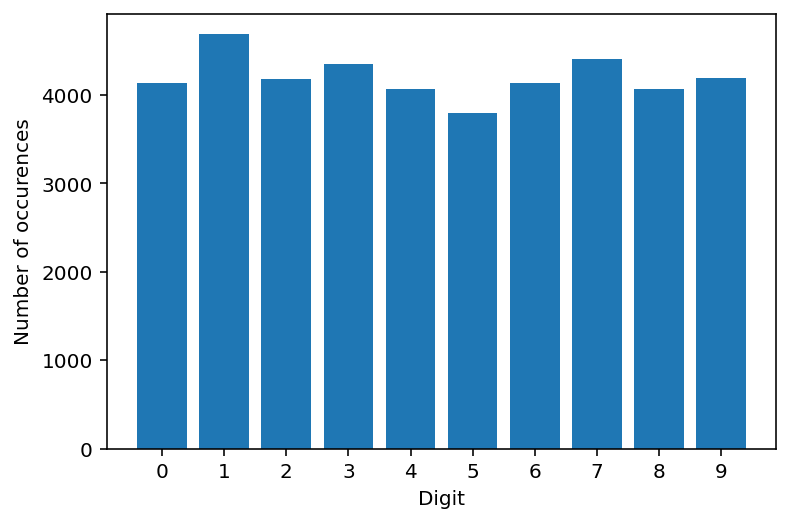

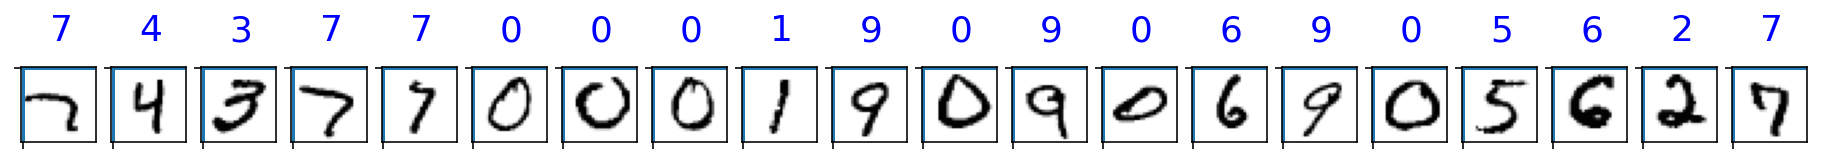

In [6]:
#| label: fig-2plots
#| fig-cap: Preview of the training data
#| fig-subcap:
#|   - Distribution of digits in the training set
#|   - Example of digits
#| layout-ncol: 2
#| layout:
#|   - - 20
#|     - -10
#|     - 80
#| layout-valign: bottom

# Distribution of the digit in the train set
labels, counts = np.unique(y_train, return_counts=True)
plt.bar(labels, counts, align='center')
plt.xticks(list(range(0, 10)))
plt.xlabel('Digit')
plt.ylabel('Number of occurences')

# Glance at the data
count = 0
sample_size = 20
plt.figure(figsize=(16, 6))
for i in np.random.permutation(X_train.shape[0])[:sample_size]:
    count = count + 1
    plt.subplot(1, sample_size, count)
    plt.axhline("")
    plt.axvline("")
    plt.text(x=10, y=-10, s=y_train[i], fontsize=18, color="b")
    plt.imshow(X_train[i].reshape(28, 28), cmap=plt.cm.Greys)
plt.show()